In [2]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.stats import pearsonr
import pandas as pd
import json
import numpy as np
import os
import requests
import nltk
import seaborn as sns

In [57]:
###########
#Gather shelters in the area
##############
"""
key='Placeholder'#Redacted
shelters=[]

for zipcode in ['73301','60629','10001']: #Austin, New York, Chicago:
    response=requests.get('http://api.petfinder.com/shelter.find?key='+key+'&location='+zipcode+'&format=json')
    for x in response.json()['petfinder']['shelters']['shelter']:
        shelters.append(x['id'])
shelters=[x['$t'] for x in shelters]


##################
#Get animal descriptions within those shelters
###################
descriptions=[]
for x in shelters:
    response=requests.get('http://api.petfinder.com/shelter.getPets?key='+key+'&id='+x+'&format=json&output=full')
    try:
        for y in response.json()['petfinder']['pets']['pet']:
            #print(y['description']['$t'])
            try:
                descriptions.append(y['description']['$t'])
            except:
                pass
    except:
        pass
"""

In [21]:
descriptions=pd.read_csv('ScrappedDataPetfinder.csv',header=None)
descriptions=list(descriptions[1])

In [22]:
###########
#Clean Description
###########
c_v=CountVectorizer(stop_words='english',strip_accents='unicode',min_df=3)
trained=c_v.fit_transform(descriptions)
transformer = TfidfTransformer()
idfed = transformer.fit_transform(trained)

mapper={}
for tup in nltk.pos_tag(c_v.get_feature_names()):
    mapper[tup[0]]=tup[1]

In [23]:
#################
#DF for Plotting
#################
one_df=pd.DataFrame()
one_df['Word']=list(c_v.get_feature_names())
one_df['Relative Frequency']=list(idfed.sum(axis=0).getA()[0])
one_df['POS']=one_df['Word'].apply(lambda x: mapper[x])

adjective_frequency=one_df.loc[one_df['POS'].isin(['JJ','JJR','JJS'])].sort_values('Relative Frequency')


Text(0.5,0,'Adjectives')

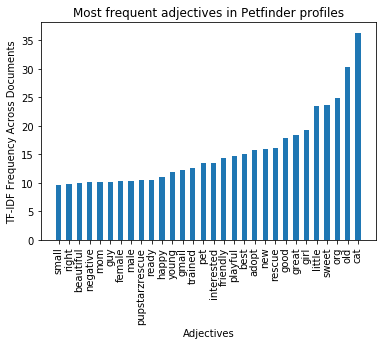

In [24]:
###############
#Frequency Plot
###############
top_words=adjective_frequency[-30:]
fig,ax=plt.subplots(1,1)
ax.bar(range(0,60,2),top_words['Relative Frequency'],1)
ax.set_xticks(range(0,60,2))
ax.set_xticklabels(top_words['Word'],rotation=90)
ax.set_ylabel('TF-IDF Frequency Across Documents')
ax.set_title('Most frequent adjectives in Petfinder profiles')
plt.xlabel('Adjectives')

In [27]:
#adjective_frequency[-170:].to_csv('LabelAdjectiveFrequency.csv') #Handlabelled
labeled_adjs=pd.read_csv('LabelAdjectiveFrequencywithLabels.csv')

Text(0.5,1,'Relative Frequency of Top 100 Descriptors in Petfinder Profiles in ~1000 Profiles')

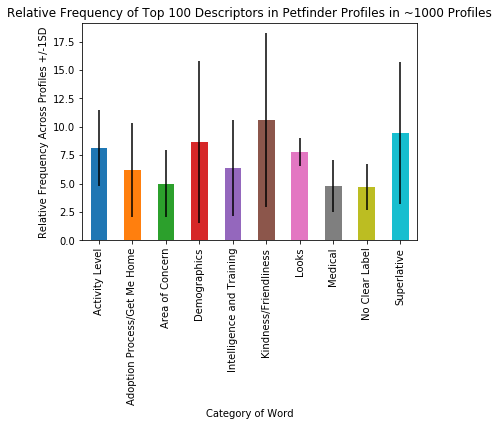

In [28]:
#############
#Second plot
#############
freq_table=labeled_adjs.groupby('Labels')['Relative Frequency'].describe()
freq_table['mean'].plot(kind='bar',yerr=freq_table['std'])
plt.xlabel('Category of Word')
plt.ylabel('Relative Frequency Across Profiles +/-1SD')
plt.title('Relative Frequency of Top 100 Descriptors in Petfinder Profiles in ~1000 Profiles')